# Энергия ферромагнетика 2D (2023)

### Условие задачи

**Дано:**
- двумерная решетка молекул, расположенных в узлах кристаллической решетки, размеров $L_x \times L_y$ с периодическими границами
- каждая молекула обладает спином +1 или -1
- межмолекулярное взаимодействие описывается константами $J_{ij} = 1$
- модель Изинга


**Требуется:**
- согласно модели Изинга рассчитать нормированное значение средней энергии $\frac{\langle E \rangle}{Lx Ly}$ для указанной решетки молекул при:
    - размерах решетки $L_x \in [2, 3, ..., 8]$, $L_y = 4$
    - температурах $kT \in [1.0, 5.0)$ с шагом $0.1$
- сохранить массив средних энергий при помощи `np.save`
- вывести время расчета каждой итерации по $Lx$ или по $k T$
- отобразить цветовую карту:
    - ось абсцисс - $L_x$,
    - ось ординат - $k T$,
    - цветом отобразить нормированное значение средней энергии $\frac{\langle E \rangle}{Lx Ly}$,
    - подписать оси,
    - отобразить цветовую шкалу (`colorbar`),
    - засечки должны соответствовать значениям $Lx, kT$.
- к каждой функции добавить `docstring` с описанием того, что функция делает, всех параметров и возвращаемого значения    

**Описание:**

**Одномерный случай**

Модель Изинга является моделью магнетика. Пусть этот магнетик состоит из молекул, расположенных в узлах регулярной решетки. Пусть всего таких узлов будет $N$ штук, с индексами $i=1,\ldots, N$.

Предположим, что каждая молекула может быть представлена в виде магнитной стрелки, которая всегда либо направлена вдоль некоторой заданной оси, либо в противоположном направлении. То есть каждая молекула $i$ имеет две конфигурации, которые можно описывать с помощью "спиновой" переменной $\sigma_i$. Эта переменная принимает значение $+1$ (параллельно оси, спин направлен вверх) и $-1$ (антипараллельно оси, спин направлен вниз).

Пусть $\sigma = \{\sigma_1, \sigma_2, \ldots, \sigma_N\}$ обозначает набор значений всех $N$ спинов. Имеется $2^N$ различных наборов $\sigma$, и каждый из них описывает некоторое состояние системы. 

Гамильтониан системы  состоит из двух частей: первая $E_0$ включает вклад межмолекулярных сил внутри магнетика, а вторая $E_1(\sigma)$ вклад от взаимодействий каждого спина с внешним магнитным полем (здесь считается нулевым). 
$$H(\sigma)=E_0(\sigma)+E_1(\sigma)$$

В любой физической системе мы предполагаем все взаимодействия инвариантными по отношению к обращению времени, что означает инвариантность $E$ при изменении знаков всех полей и намагниченностей. Энергия должна быть четной функцией от $\sigma$:
$$E_0(\sigma_1,\ldots, \sigma_N)=E_0(-\sigma_1,\ldots, -\sigma_N)$$

Энергия системы при нулевом внешнем магнитном поле равна сумме произведений **соседних** спинов на константы взаимодействия $J_{ij}$
$$E(\sigma) = -\sum_{i} J_{i,i+1}\sigma_{i}\sigma_{i+1} $$

Вероятность находиться в состоянии $\sigma$
$$P(\sigma)=\frac{e^{-\beta E(\sigma)}}{Z},$$
	где $Z = \sum_{\sigma} e^{-\beta E(\sigma)}-$ статистическая сумма, $\beta = \frac{1}{k T}-$ обратная температура, $k-$ константа Больцмана.
	
Средняя энергия системы 
$$\langle E \rangle = \frac{1}{Z}\sum_{\{\sigma \}} E(\sigma)e^{-\frac{E(\sigma)}{kT}}$$
рассчитывается по всевозможным состояниям системы, т.е. всевозможным наборам $\sigma$.

**Двумерный случай**

В случае двумерной решетки энергия системы при нулевом внешнем магнитном поле вычисляется следующим образом: 
$$E(\sigma) = -\sum_{i,j} J_{ij}(\sigma_{i,j}\sigma_{i+1,j} + \sigma_{i,j}\sigma_{i,j+1})$$


**Проверка корректности результатов**

Нормированное значение средней энергии при температурах $kT \in [1.0, 5.0)$:

- для $L_x=4$

```
 -1.99715844 -1.99396091 -1.98856632 -1.98016965 -1.96786355 -1.95064256
 -1.9274244  -1.89711215 -1.85871667 -1.81153907 -1.75538029 -1.69071311
 -1.61874282 -1.54131149 -1.46065977 -1.37911648 -1.29880759 -1.22145424
 -1.14828469 -1.0800446  -1.01706963 -0.95938399 -0.90679838 -0.85899291
 -0.8155803  -0.77615005 -0.74029707 -0.70763857 -0.67782287 -0.65053286
 -0.62548613 -0.60243323 -0.58115501 -0.56145948 -0.5431787  -0.52616582
 -0.5102923  -0.49544555 -0.48152673 -0.46844889
```

- для $L_x=5$

```
 -1.99715893 -1.99396296 -1.98857263 -1.98018387 -1.96788363 -1.95063964
 -1.92729692 -1.89661121 -1.85735639 -1.80853133 -1.74965024 -1.68103752
 -1.60399878 -1.52075577 -1.43412763 -1.3470633  -1.26219309 -1.18153361
 -1.10638872 -1.03740747 -0.97472647 -0.918132   -0.86720255 -0.82141645
 -0.78022445 -0.74309384 -0.70953215 -0.67909749 -0.65140075 -0.62610332
 -0.60291264 -0.58157686 -0.56187952 -0.54363452 -0.52668165 -0.51088271
 -0.49611811 -0.48228409 -0.46929029 -0.45705774
```

**Материалы:**
- [Бэкстер Р., Вольский Е. П., Дайхин Л. И. Точно решаемые модели в статистической механике](https://yadi.sk/i/2oY4c0bL08pNiw)
- [Пример хорошего `docstring`](https://github.com/numpy/numpy/blob/v1.21.0/numpy/linalg/linalg.py#L313-L395)
- [Зиннуров Б.Д., Якименко В.Я. Магнитные свойства модели Изинга в низких размерностях (МКР)](https://miem.hse.ru/data/2018/05/24/1149431665/model_Izinga_-_Zinnurov_Yakimenko.pdf)


**Правила оценивания:**

- оценка за корректно выполненный расчет для количества молекул в цепочке $L_x$, баллов из 100:
```
    Lx    =   2,   3,   4,   5,    6,    7,     8
    g(Lx) = 1.0, 1.8, 3.3, 6.4, 12.6, 24.9,  50.0
```
    
- штрафы $p(i)$, баллов:
    - не выведено время расчета - 20
    - не выведены значения средней энергии - 20
    - не построена карта - 20
    - отсутствует `docstring` - 20
    - менее значимые недоработки - 10


- итоговая оценка за задание = $\sum_{Lx=2}^{8}{g(Lx)} - \sum_{i}{p(i)}$


In [2]:
import numpy as np
from numba import njit, prange
import time
@njit(nogil=True)
def initialize_configuration(Lx, Ly, config_number):
    spins = np.empty(Lx * Ly, dtype=np.int8)
    flag = np.int64(config_number)
    
    for index in range(Lx * Ly):
        spins[index] = -1 if flag & 1 == 0 else 1
        flag = flag >> 1
    
    return spins.reshape(Lx, Ly)

@njit(parallel=True, nogil=True)
def calculate_energy(spins, J):
    Lx, Ly = spins.shape
    energy = 0
    
    for i in range(Lx):
        for j in range(Ly):
            energy -= spins[i, j] * (spins[(i + 1) % Lx, j] + spins[i, (j + 1) % Ly]) * J
    
    return energy

@njit(parallel=True, nogil=True)
def izing_model_energy(Lx, Ly, temperature):
    N = Lx * Ly
    unscaled_energies = np.zeros(2**N)
    probabilities = np.zeros(2**N)
    
    for config_number in prange(2**N):
        energy, coupling_constant = 0, 1
        spins = initialize_configuration(Lx, Ly, config_number)
        
        for i in range(Lx):
            for j in range(Ly):
                energy -= spins[i, j] * (spins[(i + 1) % Lx, j] + spins[i, (j + 1) % Ly]) * coupling_constant
        
        probability = np.exp(-energy / temperature)
        unscaled_energies[config_number] = energy
        probabilities[config_number] = probability

    probabilities /= np.sum(probabilities)
    return np.sum(probabilities * unscaled_energies) * (1 / N)
# Пример использования для Lx = 4, Ly = 4, T = 1.0
grid_size_x = 4
grid_size_y = 4
temperature = 1.0

# Засекаем время начала выполнения кода
start_time = time.time()

result = izing_model_energy(grid_size_x, grid_size_y, temperature)

# Выводим результаты и время выполнения
print(f"Izing Model Energy for Lx={grid_size_x}, Ly={grid_size_y}, T={temperature}: {result}")
print(f"Execution time: {time.time() - start_time:.4f} seconds")


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Izing Model Energy for Lx=4, Ly=4, T=1.0: -1.9971584402559688
Execution time: 1.7123 seconds


In [59]:
import numpy as np

# Задаем размер решетки
Lx = 2
Ly = 4

# Создаем массив значений температур от 1.0 до 4.9 с шагом 0.1
temperatures = np.arange(1.0, 5.0, 0.1)

# Создаем матрицу для хранения результатов
results_matrix = np.zeros((len(temperatures),))

# Вычисляем значения для каждой температуры
for i, temperature in enumerate(temperatures):
    result = izing_model_energy(Lx, Ly, temperature)
    results_matrix[i] = result

# Выводим результаты в формате матрицы с подписью
print(f"Izing Model Energy Matrix for Lx={Lx}:")
print(results_matrix)


Izing Model Energy Matrix for Lx=2:
[-1.99509474 -1.98967862 -1.98074878 -1.96731117 -1.94851445 -1.92375828
 -1.89277291 -1.85565639 -1.81286316 -1.76514762 -1.71347563 -1.65892227
 -1.60257405 -1.5454491  -1.48844224 -1.43229537 -1.3775895  -1.3247523
 -1.27407538 -1.22573609 -1.17982015 -1.13634286 -1.09526756 -1.05652101
 -1.02000562 -0.98560898 -0.9532109  -0.92268862 -0.89392045 -0.86678827
 -0.84117913 -0.8169862  -0.79410926 -0.77245486 -0.75193626 -0.73247322
 -0.71399168 -0.69642337 -0.67970548 -0.66378023]


In [60]:
import numpy as np

# Задаем размер решетки
Lx = 3
Ly = 4

# Создаем массив значений температур от 1.0 до 4.9 с шагом 0.1
temperatures = np.arange(1.0, 5.0, 0.1)

# Создаем матрицу для хранения результатов
results_matrix = np.zeros((len(temperatures),))

# Вычисляем значения для каждой температуры
for i, temperature in enumerate(temperatures):
    result = izing_model_energy(Lx, Ly, temperature)
    results_matrix[i] = result

# Выводим результаты в формате матрицы с подписью
print(f"Izing Model Energy Matrix for Lx={Lx}:")
print(results_matrix)


Izing Model Energy Matrix for Lx=3:
[-1.99711779 -1.99383665 -1.98825271 -1.97949351 -1.96659182 -1.94853206
 -1.92432618 -1.89312223 -1.85433583 -1.80777902 -1.75375117 -1.69305981
 -1.62695673 -1.55700043 -1.48487836 -1.41223059 -1.34050963 -1.27089443
 -1.20425882 -1.14118312 -1.08199278 -1.02680913 -0.97560137 -0.92823315
 -0.88450084 -0.84416295 -0.80696158 -0.77263715 -0.7409381  -0.71162671
 -0.68448222 -0.65930219 -0.63590256 -0.61411702 -0.5937959  -0.57480491
 -0.55702372 -0.54034463 -0.52467121 -0.50991714]


In [61]:
import numpy as np

# Задаем размер решетки
Lx = 4
Ly = 4

# Создаем массив значений температур от 1.0 до 4.9 с шагом 0.1
temperatures = np.arange(1.0, 5.0, 0.1)

# Создаем матрицу для хранения результатов
results_matrix = np.zeros((len(temperatures),))

# Вычисляем значения для каждой температуры
for i, temperature in enumerate(temperatures):
    result = izing_model_energy(Lx, Ly, temperature)
    results_matrix[i] = result

# Выводим результаты в формате матрицы с подписью
print(f"Izing Model Energy Matrix for Lx={Lx}:")
print(results_matrix)


Izing Model Energy Matrix for Lx=4:
[-1.99715844 -1.99396091 -1.98856632 -1.98016965 -1.96786355 -1.95064256
 -1.9274244  -1.89711215 -1.85871667 -1.81153907 -1.75538029 -1.69071311
 -1.61874282 -1.54131149 -1.46065977 -1.37911648 -1.29880759 -1.22145424
 -1.14828469 -1.0800446  -1.01706963 -0.95938399 -0.90679838 -0.85899291
 -0.8155803  -0.77615005 -0.74029707 -0.70763857 -0.67782287 -0.65053286
 -0.62548613 -0.60243323 -0.58115501 -0.56145948 -0.5431787  -0.52616582
 -0.5102923  -0.49544555 -0.48152673 -0.46844889]


In [62]:
import numpy as np

# Задаем размер решетки
Lx = 5
Ly = 4

# Создаем массив значений температур от 1.0 до 4.9 с шагом 0.1
temperatures = np.arange(1.0, 5.0, 0.1)

# Создаем матрицу для хранения результатов
results_matrix = np.zeros((len(temperatures),))

# Вычисляем значения для каждой температуры
for i, temperature in enumerate(temperatures):
    result = izing_model_energy(Lx, Ly, temperature)
    results_matrix[i] = result

# Выводим результаты в формате матрицы с подписью
print(f"Izing Model Energy Matrix for Lx={Lx}:")
print(results_matrix)


Izing Model Energy Matrix for Lx=5:
[-1.99715893 -1.99396296 -1.98857263 -1.98018387 -1.96788363 -1.95063964
 -1.92729692 -1.89661121 -1.85735639 -1.80853133 -1.74965024 -1.68103752
 -1.60399878 -1.52075577 -1.43412763 -1.3470633  -1.26219309 -1.18153361
 -1.10638872 -1.03740747 -0.97472647 -0.918132   -0.86720255 -0.82141645
 -0.78022445 -0.74309384 -0.70953215 -0.67909749 -0.65140075 -0.62610332
 -0.60291264 -0.58157686 -0.56187952 -0.54363452 -0.52668165 -0.51088271
 -0.49611811 -0.48228409 -0.46929029 -0.45705774]


In [63]:
import numpy as np

# Задаем размер решетки
Lx = 6
Ly = 4

# Создаем массив значений температур от 1.0 до 4.9 с шагом 0.1
temperatures = np.arange(1.0, 5.0, 0.1)

# Создаем матрицу для хранения результатов
results_matrix = np.zeros((len(temperatures),))

# Вычисляем значения для каждой температуры
for i, temperature in enumerate(temperatures):
    result = izing_model_energy(Lx, Ly, temperature)
    results_matrix[i] = result

# Выводим результаты в формате матрицы с подписью
print(f"Izing Model Energy Matrix for Lx={Lx}:")
print(results_matrix)


Izing Model Energy Matrix for Lx=6:
[-1.99715857 -1.99396113 -1.9885651  -1.98015781 -1.96780519 -1.95042956
 -1.92678909 -1.89549406 -1.8551112  -1.80440326 -1.74270304 -1.67032538
 -1.58882722 -1.50092868 -1.41005807 -1.31969261 -1.23276666 -1.15134108
 -1.07656139 -1.00881115 -0.94793988 -0.8934793  -0.84480933 -0.8012682
 -0.76221687 -0.72707144 -0.69531564 -0.66650184 -0.6402464  -0.61622247
 -0.59415234 -0.57380002 -0.55496464 -0.53747479 -0.52118369 -0.50596511
 -0.49171009 -0.47832415 -0.46572503 -0.45384075]


In [64]:
import numpy as np

# Задаем размер решетки
Lx = 7
Ly = 4

# Создаем массив значений температур от 1.0 до 4.9 с шагом 0.1
temperatures = np.arange(1.0, 5.0, 0.1)

# Создаем матрицу для хранения результатов
results_matrix = np.zeros((len(temperatures),))

# Вычисляем значения для каждой температуры
for i, temperature in enumerate(temperatures):
    result = izing_model_energy(Lx, Ly, temperature)
    results_matrix[i] = result

# Выводим результаты в формате матрицы с подписью
print(f"Izing Model Energy Matrix for Lx={Lx}:")
print(results_matrix)


Izing Model Energy Matrix for Lx=7:
[-1.9971582  -1.99395917 -1.98855691 -1.98012917 -1.96771861 -1.95019835
 -1.92623542 -1.89429394 -1.85274448 -1.80014858 -1.73572886 -1.65989967
 -1.57458935 -1.48308936 -1.38940408 -1.29738702 -1.21005576 -1.12930451
 -1.05597909 -0.99014354 -0.93137801 -0.87902058 -0.83233016 -0.79058107
 -0.75310988 -0.71933295 -0.68874798 -0.66092782 -0.63551132 -0.61219363
 -0.59071721 -0.5708639  -0.55244826 -0.53531194 -0.51931914 -0.50435283
 -0.49031168 -0.47710754 -0.46466335 -0.45291152]


In [ ]:
import numpy as np

# Задаем размер решетки
Lx = 8
Ly = 4

# Создаем массив значений температур от 1.0 до 4.9 с шагом 0.1
temperatures = np.arange(1.0, 5.0, 0.1)

# Создаем матрицу для хранения результатов
results_matrix = np.zeros((len(temperatures),))

# Вычисляем значения для каждой температуры
for i, temperature in enumerate(temperatures):
    result = izing_model_energy(Lx, Ly, temperature)
    results_matrix[i] = result

# Выводим результаты в формате матрицы с подписью
print(f"Izing Model Energy Matrix for Lx={Lx}:")
print(results_matrix)


In [15]:
import numpy as np
from numba import njit, prange
import time

@njit(nogil=True)
def initialize_configuration(Lx, Ly, config_number):
    """
    Initialize the spin configuration based on the binary representation of config_number.

    Parameters:
    - Lx (int): Number of rows in the lattice.
    - Ly (int): Number of columns in the lattice.
    - config_number (int): Binary representation determining the spin configuration.

    Returns:
    - spins (numpy.ndarray): 2D array representing the spin configuration.
    """
    spins = np.empty(Lx * Ly, dtype=np.int8)
    flag = np.int64(config_number)
    
    for index in range(Lx * Ly):
        spins[index] = -1 if flag & 1 == 0 else 1
        flag = flag >> 1
    
    return spins.reshape(Lx, Ly)

@njit(nogil=True)
def calculate_energy(spins, J):
    """
    Calculate the energy of the Ising model for a given spin configuration.

    Parameters:
    - spins (numpy.ndarray): 2D array representing the spin configuration.
    - J (int): Coupling constant.

    Returns:
    - energy (int): Total energy of the system.
    """
    Lx, Ly = spins.shape
    energy = 0
    
    for i in range(Lx):
        for j in range(Ly):
            energy -= spins[i, j] * (spins[(i + 1) % Lx, j] + spins[i, (j + 1) % Ly]) * J
    
    return energy

@njit(nogil=True)
def izing_model_energy(Lx, Ly, temperatures):
    """
    Calculate the normalized average energy for the Ising model at different temperatures.

    Parameters:
    - Lx (int): Number of rows in the lattice.
    - Ly (int): Number of columns in the lattice.
    - temperatures (numpy.ndarray): Array of temperatures.

    Returns:
    - result (numpy.ndarray): 2D array containing the average energy for each temperature.
    """
    N = Lx * Ly
    num_configs = 2**N
    
    unscaled_energies = np.zeros(len(temperatures))
    probabilities = np.zeros(len(temperatures))
    
    for t_idx, temperature in enumerate(temperatures):
        for config_number in prange(num_configs):
            energy, coupling_constant = 0, 1
            spins = initialize_configuration(Lx, Ly, config_number)
            
            for i in range(Lx):
                for j in range(Ly):
                    energy -= spins[i, j] * (spins[(i + 1) % Lx, j] + spins[i, (j + 1) % Ly]) * coupling_constant
            
            probability = np.exp(-energy / temperature)
            unscaled_energies[t_idx] += energy * probability
            probabilities[t_idx] += probability

        if probabilities[t_idx] != 0:
            unscaled_energies[t_idx] /= probabilities[t_idx]
    
    result = unscaled_energies * (1 / N)
    return result

# Создаем массив размеров решетки от 2 до 8
sizes_Lx = np.arange(2, 9)

# Задаем размер решетки
Ly = 4

# Создаем массив значений температур от 1.0 до 4.9 с шагом 0.1
temperatures = np.linspace(1.0, 4.9, 41)

# Создаем массив для сохранения средних энергий
average_energies = np.empty((len(sizes_Lx), len(temperatures)))

# Вычисляем значения для каждого размера решетки и температуры
for i, Lx in enumerate(sizes_Lx):
    # Засекаем время начала выполнения кода
    start_time = time.time()
    result = izing_model_energy(Lx, Ly, temperatures)
    # Сохраняем среднюю энергию в массив
    average_energies[i] = result
    
    # Засекаем время окончания выполнения кода
    end_time = time.time()
    
    # Выводим результат и время выполнения
    print(f"{end_time - start_time:.6f} seconds elapsed on Lx={Lx}")

# Сохраняем массив средних энергий
np.save('average_energies.npy', average_energies)
# Выводим содержимое массива средних энергий


0.301230 seconds elapsed on Lx=2
0.021497 seconds elapsed on Lx=3
0.367595 seconds elapsed on Lx=4
6.549293 seconds elapsed on Lx=5
110.260552 seconds elapsed on Lx=6
1875.293525 seconds elapsed on Lx=7
31535.900992 seconds elapsed on Lx=8
Average Energies Matrix:
[[-1.99509474 -1.98985256 -1.98129445 -1.96849556 -1.95065478 -1.9271914
  -1.89781817 -1.86257871 -1.82184341 -1.77626541 -1.72670665 -1.67414873
  -1.6196044  -1.56404219 -1.50833139 -1.45320931 -1.39926829 -1.34695821
  -1.29659894 -1.24839846 -1.20247283 -1.1588656  -1.11756542 -1.07852096
  -1.04165316 -1.00686494 -0.97404859 -0.94309135 -0.91387944 -0.8863009
  -0.86024748 -0.83561592 -0.81230862 -0.79023403 -0.7693067  -0.74944724
  -0.73058207 -0.71264319 -0.69556778 -0.67929792 -0.66378023]
 [-1.99711779 -1.99394335 -1.98859962 -1.98028169 -1.96809725 -1.95110619
  -1.92838473 -1.8991182  -1.86271534 -1.81892449 -1.76792276 -1.71034942
  -1.6472673  -1.58005614 -1.51026205 -1.43943757 -1.36900462 -1.30016054
  -1.233

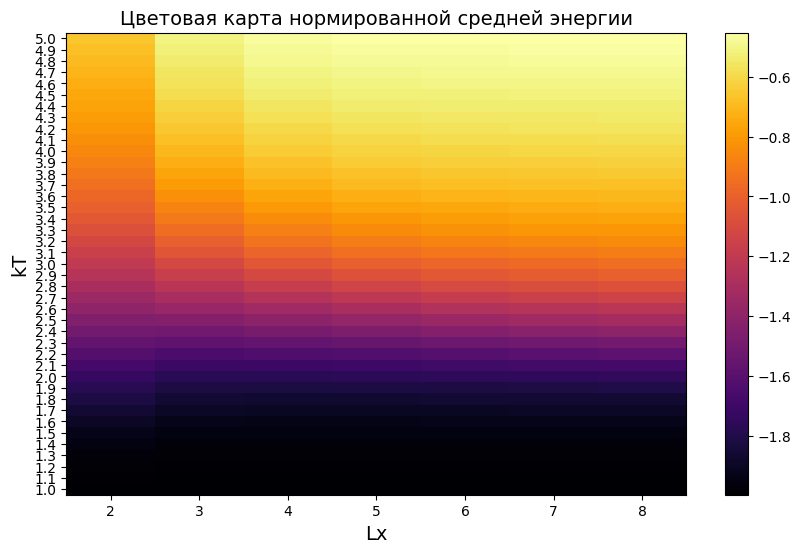

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Загружаем данные из файла
average_energies = np.load('average_energies.npy')

# Создаем массив размеров решетки от 2 до 8
sizes_Lx = np.arange(2, 9, 1).astype(int)
# Создаем массив значений температур от 1.0 до 5.0 с шагом 0.1
temperatures = np.arange(1.0, 5.1, 0.1)

# Создаем сетку для графика
X, Y = np.meshgrid(sizes_Lx, temperatures)

# Построим цветовую карту
plt.figure(figsize=(10, 6))
plt.pcolormesh(X, Y, average_energies.T, cmap='inferno', shading='auto')
plt.xlabel('Lx', fontsize=14)
plt.ylabel('kT', fontsize=14)
plt.xticks(sizes_Lx)
plt.yticks(temperatures)
plt.colorbar()
plt.title('Цветовая карта нормированной средней энергии', fontsize=14)
plt.show()
